In [2]:
import numpy as np 
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_excel(f"/workspace/Job_based_projects/Data Analyst/British Airways/British_Airlines_review1.xlsx")


In [4]:
dataset.columns

Index(['Name', 'Date Published', 'review', 'overall rating',
       'Verified customer', 'type of travel', 'Route', 'Date of Travel',
       'Seat Type', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
       'Inflight Entertainment', 'Ground Service', 'wifi connectivity',
       'Value For Money'],
      dtype='object')

## Data Cleaning

In [5]:
dataset["Date Published"]
def date_spliter(date_str):
    dates = date_str.split()
    
    day = dates[0][:-2]
    month = dates[1]
    year =  dates[2]
    return day,month,year
 
dataset[["Day Published", "Month Published", "Year Published"]] = dataset["Date Published"].apply(date_spliter).apply(pd.Series)
dataset.drop(columns=['Date Published','Day Published'])

,Name,review,overall rating,Verified customer,type of travel,Route,Date of Travel,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,wifi connectivity,Value For Money,Month Published,Year Published
0,Daniel Chinellato,"""left me extremely disappointed""",1,Not Verified,Business,Berlin to São Paulo via London,March 2024,Economy Class,4.0,4.0,3.0,3.0,1.0,3.0,2,July,2024
1,Flora Dogneton,“customer service was awful”,1,Not Verified,Couple Leisure,London to Corfu,September 2023,Economy Class,1.0,1.0,NaN,NaN,1.0,NaN,1,July,2024
2,Alex Martyn,"""over 2 weeks to respond""",1,Not Verified,Solo Leisure,Toronto to London,July 2024,Economy Class,NaN,NaN,NaN,NaN,NaN,NaN,1,July,2024
3,P Jackson,“wholly inadequate customer service”,1,Verified,Couple Leisure,London Gatwick to Verona,June 2024,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1,June,2024
4,R Thornton,“the cabin crew were great”,6,Verified,Business,London Heathrow to Paris CDG,June 2024,Business Class,5.0,5.0,3.0,NaN,1.0,NaN,3,June,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,Tanmay Bhakta,British Airways customer review,2,Not Verified,NaN,NaN,NaN,Premium Economy,1.0,1.0,1.0,1.0,NaN,NaN,1,May,2014
3796,P Harris,British Airways customer review,1,Not Verified,NaN,NaN,NaN,Economy Class,3.0,3.0,3.0,1.0,NaN,NaN,2,May,2014
3797,A Amaladoss,British Airways customer review,7,Not Verified,NaN,NaN,NaN,Business Class,5.0,5.0,4.0,1.0,NaN,NaN,4,May,2014
3798,Alan Clare,British Airways customer review,5,Not Verified,NaN,NaN,NaN,Economy Class,3.0,3.0,3.0,4.0,NaN,NaN,5,May,2014


In [6]:
dataset[['month of Travel', 'year of travel']]= dataset['Date of Travel'].str.split(' ', expand=True)
dataset

,Name,Date Published,review,overall rating,Verified customer,type of travel,Route,Date of Travel,Seat Type,Seat Comfort,...,Food & Beverages,Inflight Entertainment,Ground Service,wifi connectivity,Value For Money,Day Published,Month Published,Year Published,month of Travel,year of travel
0,Daniel Chinellato,9th July 2024,"""left me extremely disappointed""",1,Not Verified,Business,Berlin to São Paulo via London,March 2024,Economy Class,4.0,...,3.0,3.0,1.0,3.0,2,9,July,2024,March,2024
1,Flora Dogneton,5th July 2024,“customer service was awful”,1,Not Verified,Couple Leisure,London to Corfu,September 2023,Economy Class,1.0,...,NaN,NaN,1.0,NaN,1,5,July,2024,September,2023
2,Alex Martyn,1st July 2024,"""over 2 weeks to respond""",1,Not Verified,Solo Leisure,Toronto to London,July 2024,Economy Class,NaN,...,NaN,NaN,NaN,NaN,1,1,July,2024,July,2024
3,P Jackson,30th June 2024,“wholly inadequate customer service”,1,Verified,Couple Leisure,London Gatwick to Verona,June 2024,Economy Class,1.0,...,1.0,1.0,1.0,1.0,1,30,June,2024,June,2024
4,R Thornton,26th June 2024,“the cabin crew were great”,6,Verified,Business,London Heathrow to Paris CDG,June 2024,Business Class,5.0,...,3.0,NaN,1.0,NaN,3,26,June,2024,June,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,Tanmay Bhakta,8th May 2014,British Airways customer review,2,Not Verified,NaN,NaN,NaN,Premium Economy,1.0,...,1.0,1.0,NaN,NaN,1,8,May,2014,NaN,NaN
3796,P Harris,7th May 2014,British Airways customer review,1,Not Verified,NaN,NaN,NaN,Economy Class,3.0,...,3.0,1.0,NaN,NaN,2,7,May,2014,NaN,NaN
3797,A Amaladoss,7th May 2014,British Airways customer review,7,Not Verified,NaN,NaN,NaN,Business Class,5.0,...,4.0,1.0,NaN,NaN,4,7,May,2014,NaN,NaN
3798,Alan Clare,7th May 2014,British Airways customer review,5,Not Verified,NaN,NaN,NaN,Economy Class,3.0,...,3.0,4.0,NaN,NaN,5,7,May,2014,NaN,NaN


In [7]:
dataset[["from Route", "To Route"]] = dataset["Route"].str.extract(r'(.*?)(?: to | - )(.*)')
dataset.drop(columns=["Route"], inplace=True)
dataset.head(2)

,Name,Date Published,review,overall rating,Verified customer,type of travel,Date of Travel,Seat Type,Seat Comfort,Cabin Staff Service,...,Ground Service,wifi connectivity,Value For Money,Day Published,Month Published,Year Published,month of Travel,year of travel,from Route,To Route
0,Daniel Chinellato,9th July 2024,"""left me extremely disappointed""",1,Not Verified,Business,March 2024,Economy Class,4.0,4.0,...,1.0,3.0,2,9,July,2024,March,2024,Berlin,São Paulo via London
1,Flora Dogneton,5th July 2024,“customer service was awful”,1,Not Verified,Couple Leisure,September 2023,Economy Class,1.0,1.0,...,1.0,NaN,1,5,July,2024,September,2023,London,Corfu


In [8]:
dataset["overall rating"] = pd.to_numeric(dataset["overall rating"], errors='coerce')
dataset["overall rating"] = dataset["overall rating"].fillna(dataset["overall rating"].mean()).astype(int)

In [9]:
ratings = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
       'Inflight Entertainment', 'Ground Service', 'wifi connectivity',
       'Value For Money']

for rating in ratings:
    print(rating)
    mean_rating = round(dataset[rating].mean(), 1)
    dataset[rating] = dataset[rating].fillna(mean_rating)
    dataset[rating] = dataset[rating].round(1)

Seat Comfort
Cabin Staff Service
Food & Beverages
Inflight Entertainment
Ground Service
wifi connectivity
Value For Money


In [10]:
for col in dataset.select_dtypes(include='object').columns:
    mode_val = dataset[col].mode()[0]
    dataset[col].fillna(value=mode_val)

dataset.columns


Index(['Name', 'Date Published', 'review', 'overall rating',
       'Verified customer', 'type of travel', 'Date of Travel', 'Seat Type',
       'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
       'Inflight Entertainment', 'Ground Service', 'wifi connectivity',
       'Value For Money', 'Day Published', 'Month Published', 'Year Published',
       'month of Travel', 'year of travel', 'from Route', 'To Route'],
      dtype='object')

In [11]:
dataset['month of Travel'].fillna(dataset['Month Published'], inplace=True)

# Fill missing values in 'Year of Travel' with 'Year Published'
dataset['year of travel'].fillna(dataset['Year Published'], inplace=True)

/tmp/ipykernel_4418/644587296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['month of Travel'].fillna(dataset['Month Published'], inplace=True)
/tmp/ipykernel_4418/644587296.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [16]:
dataset['from Route'].fillna('unknown', inplace=True)
dataset['To Route'].fillna('unknown', inplace=True)
dataset['type of travel'].fillna('Couple Leisure', inplace=True)
dataset['Seat Type'].fillna('Economy Class', inplace=True)
dataset.drop(columns=["Date of Travel"])


,Name,Date Published,review,overall rating,Verified customer,type of travel,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,...,Ground Service,wifi connectivity,Value For Money,Day Published,Month Published,Year Published,month of Travel,year of travel,from Route,To Route
0,Daniel Chinellato,9th July 2024,"""left me extremely disappointed""",1,Not Verified,Business,Economy Class,4.0,4.0,3.0,...,1.0,3.0,2,9,July,2024,March,2024,Berlin,São Paulo via London
1,Flora Dogneton,5th July 2024,“customer service was awful”,1,Not Verified,Couple Leisure,Economy Class,1.0,1.0,2.7,...,1.0,1.9,1,5,July,2024,September,2023,London,Corfu
2,Alex Martyn,1st July 2024,"""over 2 weeks to respond""",1,Not Verified,Solo Leisure,Economy Class,3.2,3.2,2.7,...,2.8,1.9,1,1,July,2024,July,2024,Toronto,London
3,P Jackson,30th June 2024,“wholly inadequate customer service”,1,Verified,Couple Leisure,Economy Class,1.0,1.0,1.0,...,1.0,1.0,1,30,June,2024,June,2024,London Gatwick,Verona
4,R Thornton,26th June 2024,“the cabin crew were great”,6,Verified,Business,Business Class,5.0,5.0,3.0,...,1.0,1.9,3,26,June,2024,June,2024,London Heathrow,Paris CDG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,Tanmay Bhakta,8th May 2014,British Airways customer review,2,Not Verified,Couple Leisure,Premium Economy,1.0,1.0,1.0,...,2.8,1.9,1,8,May,2014,May,2014,unknown,unknown
3796,P Harris,7th May 2014,British Airways customer review,1,Not Verified,Couple Leisure,Economy Class,3.0,3.0,3.0,...,2.8,1.9,2,7,May,2014,May,2014,unknown,unknown
3797,A Amaladoss,7th May 2014,British Airways customer review,7,Not Verified,Couple Leisure,Business Class,5.0,5.0,4.0,...,2.8,1.9,4,7,May,2014,May,2014,unknown,unknown
3798,Alan Clare,7th May 2014,British Airways customer review,5,Not Verified,Couple Leisure,Economy Class,3.0,3.0,3.0,...,2.8,1.9,5,7,May,2014,May,2014,unknown,unknown


In [20]:
a = dataset.duplicated()
if a is True:
    print(yes)
else: 
    print("no")

no


In [13]:
dataset.describe(include='all')


,Name,Date Published,review,overall rating,Verified customer,type of travel,Date of Travel,Seat Type,Seat Comfort,Cabin Staff Service,...,Ground Service,wifi connectivity,Value For Money,Day Published,Month Published,Year Published,month of Travel,year of travel,from Route,To Route
count,3800,3800,3800,3800.000000,3800,3800,3044,3800,3800.000000,3800.000000,...,3800.000000,3800.000000,3800.000000,3800,3800,3800,3800,3800,3800,3800
unique,2932,1902,2795,NaN,2,4,120,4,NaN,NaN,...,NaN,NaN,NaN,31,12,11,12,11,374,681
top,David Ellis,19th January 2015,British Airways customer review,NaN,Not Verified,Couple Leisure,August 2015,Economy Class,NaN,NaN,...,NaN,NaN,NaN,20,October,2015,June,2015,unknown,unknown
freq,42,26,934,NaN,2556,1788,83,1987,NaN,NaN,...,NaN,NaN,NaN,168,376,738,365,769,768,768
mean,NaN,NaN,NaN,4.700263,NaN,NaN,NaN,NaN,3.236842,3.236842,...,2.777000,1.903789,2.672105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.178783,NaN,NaN,NaN,NaN,1.465695,1.465695,...,1.291243,0.555734,1.470196,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,...,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,...,2.000000,1.900000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,3.200000,3.200000,...,2.800000,1.900000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,5.000000,5.000000,...,4.000000,1.900000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
dataset.to_excel("BA_cleaned.xlsx")

## Data visualization

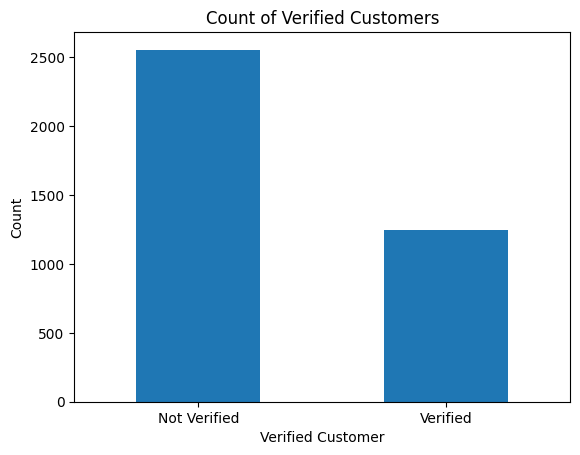

In [14]:
customer_counts = dataset['Verified customer'].value_counts()
# Plotting
customer_counts.plot(kind='bar', rot=0)
plt.xlabel('Verified Customer')
plt.ylabel('Count')
plt.title('Count of Verified Customers')
plt.show()